In [37]:
import cv2

import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [38]:
image_path = "D:/Documents/IAI-UET/AI - Image Processing/rabbit.jpeg"  # Update with the path to your image
img = cv2.imread(image_path)

## Lọc nhiễu và xác định đối tượng

Số lượng đối tượng màu vàng: 879


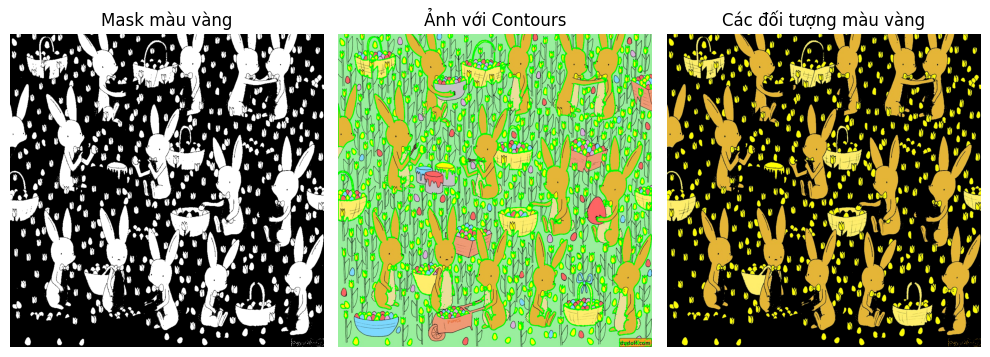

In [ ]:
# Chuyển ảnh sang không gian màu HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Định nghĩa khoảng màu vàng trong HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Tạo mask cho màu vàng
bowtie_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Áp dụng mask lên ảnh gốc để giữ lại các đối tượng màu vàng
yellow_objects = cv2.bitwise_and(img, img, mask=bowtie_mask)

# Tìm contours trong mask để xác định các đối tượng
contours, _ = cv2.findContours(bowtie_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ các contours lên ảnh gốc để hiển thị các đối tượng được phát hiện
contours_img = img.copy()
cv2.drawContours(contours_img, contours, -1, (0, 255, 0), 2)  # Màu xanh lá cho contours

# Đếm số lượng các đối tượng (contours)
num_objects = len(contours)
print(f"Số lượng đối tượng màu vàng: {num_objects}")

# Hiển thị các kết quả
plt.figure(figsize=(10, 7))

# Ảnh Mask
plt.subplot(1, 3, 1)
plt.imshow(bowtie_mask, cmap='gray')
plt.title("Mask màu vàng")
plt.axis('off')

# Ảnh Gốc với các contours
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh với Contours")
plt.axis('off')

# Ảnh kết quả sau khi áp dụng mask (Chỉ giữ các đối tượng màu vàng)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(yellow_objects, cv2.COLOR_BGR2RGB))
plt.title("Các đối tượng màu vàng")
plt.axis('off')

plt.tight_layout()
plt.show()

Số lượng đối tượng lớn màu vàng: 28


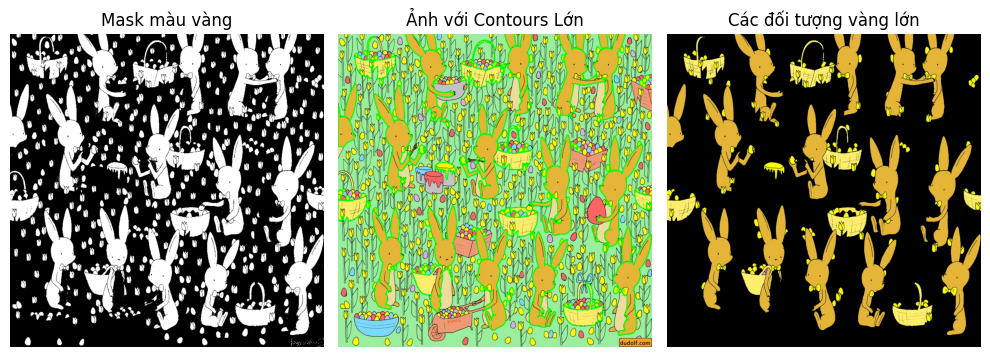

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Tạo mask cho màu vàng
bowtie_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
yellow_objects = cv2.bitwise_and(img, img, mask=bowtie_mask)

contours, _ = cv2.findContours(bowtie_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


min_area = 500 


filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
contours_img = img.copy()
cv2.drawContours(contours_img, filtered_contours, -1, (0, 255, 0), 2)  # Màu xanh lá cho contours

# Đếm số lượng các đối tượng lớn (contours)
num_objects = len(filtered_contours)
print(f"Số lượng đối tượng lớn màu vàng: {num_objects}")

# Hiển thị các kết quả
plt.figure(figsize=(10, 7))

# Ảnh Mask
plt.subplot(1, 3, 1)
plt.imshow(bowtie_mask, cmap='gray')
plt.title("Mask màu vàng")
plt.axis('off')

# Ảnh Gốc với các contours lớn
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh với Contours Lớn")
plt.axis('off')

# Ảnh kết quả sau khi áp dụng mask (Chỉ giữ các đối tượng màu vàng lớn)
yellow_objects_large = cv2.bitwise_and(img, img, mask=cv2.drawContours(np.zeros_like(bowtie_mask), filtered_contours, -1, 255, -1))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(yellow_objects_large, cv2.COLOR_BGR2RGB))
plt.title("Các đối tượng vàng lớn")
plt.axis('off')

plt.tight_layout()
plt.show()


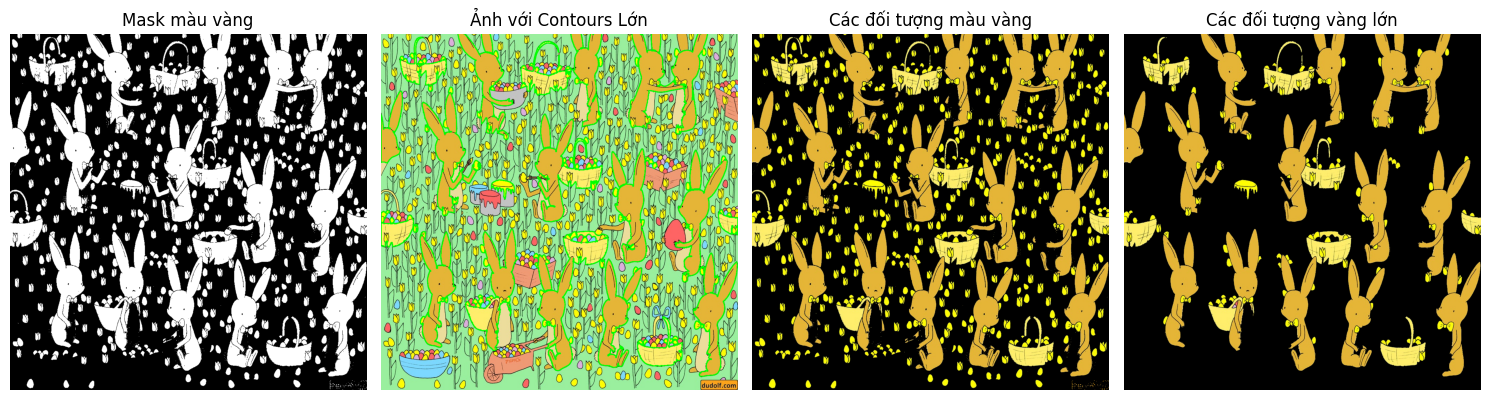

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Tạo mask cho màu vàng
bowtie_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Áp dụng mask lên ảnh gốc để giữ lại các đối tượng màu vàng
yellow_objects = cv2.bitwise_and(img, img, mask=bowtie_mask)

# Tìm contours trong mask để xác định các đối tượng
contours, _ = cv2.findContours(bowtie_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 1225 

# Lọc các contours dựa trên diện tích
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Vẽ các contours lớn lên ảnh gốc
contours_img = img.copy()
cv2.drawContours(contours_img, filtered_contours, -1, (0, 255, 0), 2)  # Màu xanh lá cho contours

yellow_objects_large = cv2.bitwise_and(img, img, mask=cv2.drawContours(np.zeros_like(bowtie_mask), filtered_contours, -1, 255, -1))


plt.figure(figsize=(15, 10))

# Ảnh Mask
plt.subplot(1, 4, 1)
plt.imshow(bowtie_mask, cmap='gray')
plt.title("Mask màu vàng")
plt.axis('off')

# Ảnh Gốc với các contours lớn
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh với Contours Lớn")
plt.axis('off')

# Ảnh kết quả sau khi áp dụng mask (Chỉ giữ các đối tượng màu vàng)
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(yellow_objects, cv2.COLOR_BGR2RGB))
plt.title("Các đối tượng màu vàng")
plt.axis('off')

# Ảnh kết quả sau khi áp dụng mask (Chỉ giữ các đối tượng màu vàng lớn)
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(yellow_objects_large, cv2.COLOR_BGR2RGB))
plt.title("Các đối tượng vàng lớn")
plt.axis('off')

# Điều chỉnh layout cho đẹp
plt.tight_layout()
plt.show()


In [42]:
num_objects = len(filtered_contours)
print(f"Số lượng đối tượng lớn màu vàng: {num_objects}")


Số lượng đối tượng lớn màu vàng: 21


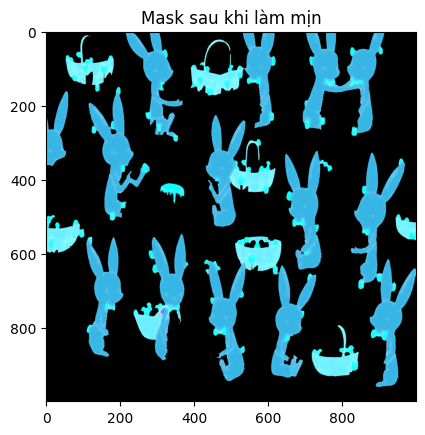

In [43]:
kernel_size = 5 #@param {type:"integer"}
#@markdown Kích thước kernel cho phép toán hình thái
kernel = np.ones((kernel_size, kernel_size), np.uint8)
mask_closed = cv2.morphologyEx(yellow_objects_large, cv2.MORPH_CLOSE, kernel)

#Hiển thị mask sau khi làm mịn
plt.imshow(mask_closed, cmap="gray")
plt.title("Mask sau khi làm mịn")
plt.show()

## Loại bỏ giỏ hàng đơn

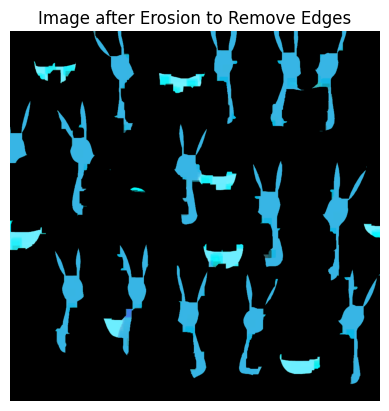

In [44]:
kernel = np.ones((4, 4), np.uint8)  # Define the kernel for erosion
eroded_image = cv2.erode(mask_closed, kernel, iterations=5)

# Display the cleaned image
plt.imshow(eroded_image, cmap='gray')
plt.title('Image after Erosion to Remove Edges')
plt.axis('off')
plt.show()

In [45]:
morphology_image = eroded_image

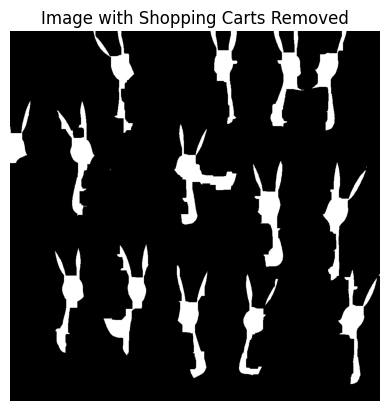

In [46]:
if len(morphology_image.shape) > 2:
    morphology_image = cv2.cvtColor(morphology_image, cv2.COLOR_BGR2GRAY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(morphology_image, connectivity=8)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(morphology_image, connectivity=8)

def remove_shopping_carts(labels, stats, max_width_height_ratio=1.0):
    filtered_mask = np.zeros_like(morphology_image, dtype=np.uint8)
    
    for i in range(1, num_labels):  
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        
        # Calculate the aspect ratio (width to height)
        aspect_ratio = float(w) / h if h > 0 else 0
        
        # Exclude components with a high aspect ratio (likely carts)
        if aspect_ratio <= max_width_height_ratio:
            filtered_mask[labels == i] = 255  # Keep valid rabbits
    
    return filtered_mask

# Remove shopping carts from the image
filtered_image = remove_shopping_carts(labels, stats)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.title('Image with Shopping Carts Removed')
plt.axis('off')
plt.show()

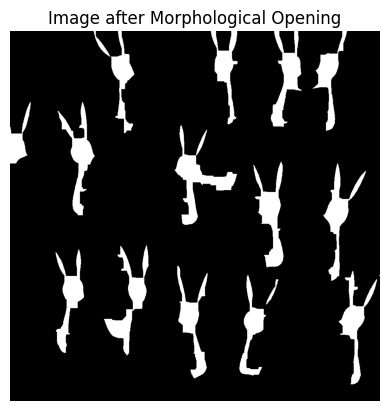

In [47]:
kernel = np.ones((2, 2), np.uint8)
opened_image = cv2.morphologyEx(filtered_image, cv2.MORPH_OPEN, kernel, iterations=1)

# Display the result
plt.imshow(opened_image, cmap='gray')
plt.title('Image after Morphological Opening')
plt.axis('off')
plt.show()

In [48]:
output_path_morphology = "morphology_image_2.png"
cv2.imwrite(output_path_morphology, opened_image)

True

## Xác định đối tượng dựa trên đặc điểm hình thái

### Đoạn mã đầu tiên (Sai lần 1)

In [49]:
def detect_and_annotate_rabbits(image_path, output_path="rabbit_annotation.jpg", min_area=50, area_ratio_threshold=0.5):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return

        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)


        # Morphological Operations
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

        contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        rabbit_faces = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = float(w) / h
                if 0.2 < aspect_ratio < 1.0:
                    rabbit_faces.append(contour)

        color_img = cv2.imread(image_path)
        if color_img is None:
            print(f"Error: Could not load color image")
            return

        # Annotate Rabbit Faces
        rabbit_count = 0
        for i, contour in enumerate(rabbit_faces):
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
            rabbit_count+=1
            # Add a number to each rabbit
            text = str(i + 1) 
            cv2.putText(color_img, text, (x + 5, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2) # Place text

        textNumber = f"Rabbits Found: {rabbit_count}"
        cv2.putText(color_img, textNumber, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2) # Blue

        # Save the Annotated Image
        cv2.imwrite(output_path, color_img)
        print(f"Rabbit faces detected, annotated, and saved to {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

image_file = "morphology_image_2.png" 
detect_and_annotate_rabbits(image_file)

def generate_dummy_image(filename="morphology_image_2.png"):
    dummy_img = np.zeros((200, 200), dtype=np.uint8)
    dummy_img[50:70, 50:60] = 255
    dummy_img[100:120, 100:110] = 255
    dummy_img[150:170, 150:160] = 255
    cv2.imwrite(filename, dummy_img)
    print(f"Dummy image created at {filename}")

try:
    with open(image_file, 'r'):
        pass 
except FileNotFoundError:
    generate_dummy_image(image_file)

Rabbit faces detected, annotated, and saved to rabbit_annotation.jpg


### Đoạn mã đầu tiên (Sai lần 2)

In [50]:
def detect_and_annotate_rabbits(image_path, output_path="rabbit_annotation_v11.jpg",
                               min_area=50, aspect_ratio_range=(0.2, 1.0),
                               head_ratio_threshold=0.15,
                               head_x_offset = 0.25, head_w_factor = 0.5, head_h_factor = 0.3):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return
        
        blurred = cv2.GaussianBlur(img, (5, 5), 0)

        thresh1 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)
        thresh2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

        contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours1) > len(contours2):
            thresh = thresh1
            contours = contours1
            inverted = True
        else:
            thresh = thresh2
            contours = contours2
            inverted = False

        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

        rabbit_faces = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = float(w) / h
                if aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1]:
                    # Attempt to find a "head-like" region
                    mask = np.zeros_like(img)
                    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
                    head_mask = np.zeros_like(img)

                    #Heuristic region for the Head
                    head_x = int(x + w * head_x_offset)
                    head_y = int(y)
                    head_w = int(w * head_w_factor)
                    head_h = int(h * head_h_factor)

                    cv2.rectangle(head_mask,(head_x,head_y), (head_x+head_w, head_y+head_h), 255, -1)

                    intersect_area_matrix = cv2.bitwise_and(mask, mask, mask = head_mask)
                    intersected_area = np.sum(intersect_area_matrix==255)

                    ratio_head = intersected_area/area
                    if(ratio_head > head_ratio_threshold):
                        rabbit_faces.append(contour)

        # Load color image
        color_img = cv2.imread(image_path)
        if color_img is None:
            print(f"Error: Could not load color image")
            return

        # 6. Annotate Rabbit Faces
        rabbit_count = 0
        for i, contour in enumerate(rabbit_faces):
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
            rabbit_count += 1
            # Add a number to each rabbit
            text = str(i + 1)  
            cv2.putText(color_img, text, (x + 5, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0),
                        2) 

        # Add rabbit number
        textNumber = f"Rabbits Found: {rabbit_count}"
        cv2.putText(color_img, textNumber, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  # Blue

        cv2.imwrite(output_path, color_img)
        print(f"Rabbit faces detected, annotated, and saved to {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")


# Example Usage
image_file = "morphology_image_2.png"  

detect_and_annotate_rabbits(image_file,
                           min_area=30,  #Allow detecting smaller rabbits
                           aspect_ratio_range=(0.2, 1.0),  #Standard aspect ratio
                           head_ratio_threshold=0.15,  #Reasonable starting point
                           head_x_offset=0.25,  #Standard starting point
                           head_w_factor=0.5,   #Standard starting point
                           head_h_factor=0.3)    #Standard starting point

def generate_dummy_image(filename="morphology_image_2.png"):
    dummy_img = np.zeros((200, 200), dtype=np.uint8)
    dummy_img[50:70, 50:60] = 255
    dummy_img[100:120, 100:110] = 255
    dummy_img[150:170, 150:160] = 255
    cv2.imwrite(filename, dummy_img)
    print(f"Dummy image created at {filename}")

try:
    with open(image_file, 'r'):
        pass  
except FileNotFoundError:
    generate_dummy_image(image_file)

Rabbit faces detected, annotated, and saved to rabbit_annotation_v11.jpg


### Code đúng khi phát hiện thỏ

In [51]:
def detect_and_annotate_rabbits(image_path, output_path="rabbit_annotation_v14.jpg",
                                min_area=1500, aspect_ratio_range=(0.08, 1.3),
                                head_ratio_threshold=0.07, head_x_offset=0.15,
                                head_w_factor=0.7, head_h_factor=0.45,
                                morph_kernel_size=(2, 2), morph_iterations=1,
                                adaptive_block_size=9, adaptive_constant=1,
                                box_color=(255, 0, 0), text_color=(255, 0, 0)): 
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        blurred = cv2.GaussianBlur(img, (3, 3), 0)  

        # 3. Adaptive Thresholding (Crucial for robustness)
        thresh1 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV, adaptive_block_size, adaptive_constant)
        thresh2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, adaptive_block_size, adaptive_constant)

        contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours1) > len(contours2):
            thresh = thresh1
            contours = contours1
            inverted = True
        else:
            thresh = thresh2
            contours = contours2
            inverted = False

        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, morph_kernel_size)
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=morph_iterations)

        morph_open = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=1)

        rabbit_faces = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = float(w) / h
                if aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1]:
                    # Attempt to find a "head-like" region
                    mask = np.zeros_like(img)
                    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
                    head_mask = np.zeros_like(img)

                    # Heuristic region for the Head
                    head_x = int(x + w * head_x_offset)
                    head_y = int(y)
                    head_w = int(w * head_w_factor)
                    head_h = int(h * head_h_factor)

                    cv2.rectangle(head_mask, (head_x, head_y), (head_x + head_w, head_y + head_h), 255, -1)

                    intersect_area_matrix = cv2.bitwise_and(mask, mask, mask=head_mask)
                    intersected_area = np.sum(intersect_area_matrix == 255)

                    ratio_head = intersected_area / area
                    if ratio_head > head_ratio_threshold:
                        rabbit_faces.append(contour)

        # Load color image for final annotation
        color_img = cv2.imread(image_path)
        if color_img is None:
            print(f"Error: Could not load color image")
            return

        rabbit_count = 0
        for i, contour in enumerate(rabbit_faces):
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(color_img, (x, y), (x + w, y + h), box_color, 2)  # Use specified box color
            rabbit_count += 1
            # Add a number to each rabbit
            text = str(i + 1)  
            cv2.putText(color_img, text, (x + 5, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2) 

        # Add total count
        textNumber = f"Rabbits Found: {rabbit_count}"
        cv2.putText(color_img, textNumber, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2)  

        cv2.imwrite(output_path, color_img)
        print(f"Rabbit faces detected, annotated, and saved to {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")


image_file = "morphology_image_2.png"  
output_file = "rabbit_annotation_v14.jpg"  

# Set the box_color and text_color to blue (BGR format)
box_color = (255, 255, 0)  # Blue
text_color = (255, 0, 0)  # Blue

detect_and_annotate_rabbits(image_file, output_path=output_file, box_color=box_color, text_color=text_color)

Rabbit faces detected, annotated, and saved to rabbit_annotation_v14.jpg


In [52]:
def extract_blue_boxes_transparent(input_image_path, output_image_path="blue_boxes_only.png"):
    try:

        img = cv2.imread(input_image_path)

        if img is None:
            raise ValueError(f"Could not load image from {input_image_path}")


        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower_color = np.array([80,70,50]) 
        upper_color = np.array([100,255,255])  
        mask = cv2.inRange(hsv, lower_color, upper_color) 

        extract_color = cv2.bitwise_and(img, img, mask= mask) 

        alpha_extract = cv2.cvtColor(extract_color, cv2.COLOR_BGR2GRAY)
        _, alpha = cv2.threshold(alpha_extract, 0, 255, cv2.THRESH_BINARY)
        b, g, r = cv2.split(extract_color) # We know load in BGR so

        rgba = cv2.merge((b, g, r, alpha)) # Put it all togather

        # 7. Save
        cv2.imwrite(output_image_path, rgba)
        print(f"We have generated it: {output_image_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

input_image_path = "rabbit_annotation_v14.jpg"
output_image_path = "blue_boxes_only.png"

extract_blue_boxes_transparent(input_image_path, output_image_path)

We have generated it: blue_boxes_only.png


In [53]:
def overlay_blue_boxes(original_image_path, blue_boxes_image_path, output_image_path="final_overlay.png"):
    try:

        # 1. Load images
        originalValue = cv2.imread(original_image_path)
        blueImage = cv2.imread(blue_boxes_image_path, cv2.IMREAD_UNCHANGED)

        if originalValue is None:
            raise ValueError(f"Could not load original image from {original_image_path}")
        if blueImage is None:
            raise ValueError(f"Could not load blue boxes image from {blue_boxes_image_path}")

        # 2. Ensure images have the same dimensions (critical!)
        if originalValue.shape[:2] != blueImage.shape[:2]:
            print("Resizing blue boxes image to match original image dimensions.")
            blueImage = cv2.resize(blueImage, (originalValue.shape[1], originalValue.shape[0]))

        B, G, R, A = cv2.split(blueImage) #To transperance
        blueImageAdd = cv2.merge((B, G, R))

        setTransperancy = cv2.bitwise_and(blueImageAdd,blueImageAdd, mask=A)

        result_show_final = cv2.add(originalValue,setTransperancy )

        cv2.imwrite(output_image_path, result_show_final) 
        print(f"Did Add All Image At {output_image_path} to Images results")

    except Exception as e:
        print(f"So the Image not right here with this please what is that and correct! : {e}")


original_image_path = "D:/Documents/IAI-UET/AI - Image Processing/rabbit.jpeg"  
blue_boxes_image_path = "blue_boxes_only.png"
output_image_path = "final_overlay.png" 

overlay_blue_boxes(original_image_path, blue_boxes_image_path, output_image_path)

Did Add All Image At final_overlay.png to Images results


### Viết thêm total rabbits count

In [54]:
def overlay_blue_boxes(original_image_path, blue_boxes_image_path, output_image_path="final_overlay.png", rabbit_count=14):
    try:
        # 1. Load images
        originalValue = cv2.imread(original_image_path)
        blueImage = cv2.imread(blue_boxes_image_path, cv2.IMREAD_UNCHANGED)

        if originalValue is None:
            raise ValueError(f"Could not load original image from {original_image_path}")
        if blueImage is None:
            raise ValueError(f"Could not load blue boxes image from {blue_boxes_image_path}")

        if originalValue.shape[:2] != blueImage.shape[:2]:
            print("Resizing blue boxes image to match original image dimensions.")
            blueImage = cv2.resize(blueImage, (originalValue.shape[1], originalValue.shape[0]))

        # Extract photo components, This is all what for images
        B, G, R, A = cv2.split(blueImage) #To transperance

        # Now the Image is added with code set by that part, it is here with set values
        blueImageAdd = cv2.merge((B, G, R))

        setTransperancy = cv2.bitwise_and(blueImageAdd,blueImageAdd, mask=A)

        result_show_final = cv2.add(originalValue,setTransperancy )

        text = f"rabbits count: {rabbit_count}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (0, 0, 0)  # Black color
        thickness = 2
        position = (10, 50) 

        cv2.putText(result_show_final, text, position, font, font_scale, font_color, thickness, cv2.LINE_AA)

        cv2.imwrite(output_image_path, result_show_final)
        print(f"Did Add All Image At {output_image_path} to Images results")

    except Exception as e:
        print(f"So the Image not right here with this please what is that and correct! : {e}")

original_image_path = "D:/Documents/IAI-UET/AI - Image Processing/rabbit.jpeg"
blue_boxes_image_path = "blue_boxes_only.png"
output_image_path = "final_overlay.png"
overlay_blue_boxes(original_image_path, blue_boxes_image_path, output_image_path, rabbit_count=14)

Did Add All Image At final_overlay.png to Images results
